In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Customer Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df["customerID"].duplicated().sum()

0

# Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [15]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

In [16]:
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [18]:
df.head(35)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Text(0.5, 1.0, 'Count of customers by churn')

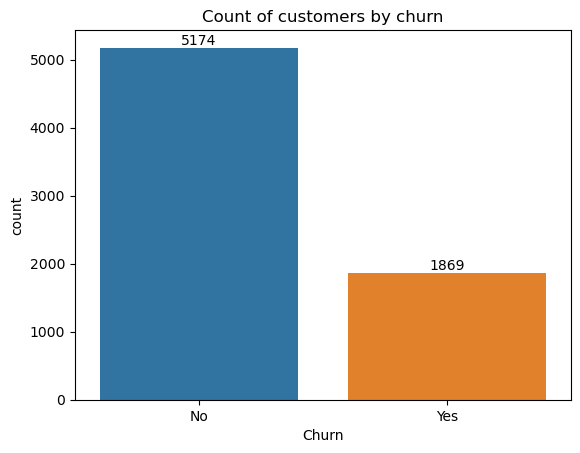

In [32]:
ax = sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn")

Text(0.5, 1.0, 'Percentage of churned customer')

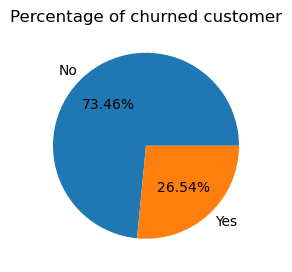

In [33]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({"Churn":"count"})
gb
plt.pie(gb["Churn"], labels = gb.index,autopct = "%1.2f%%")
plt.title("Percentage of churned customer")

# from the given chart we can conclude that 26.54% of our customer have churned out 
# Now let's explore the reason behind it

Text(0.5, 1.0, 'Churn by gender')

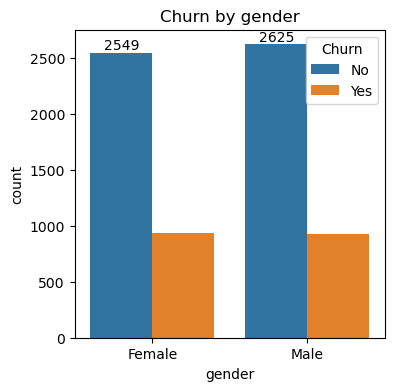

In [40]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x="gender", data = df, hue="Churn")
plt.title("Churn by gender")

Text(0.5, 1.0, 'Churn by Senior Citizen')

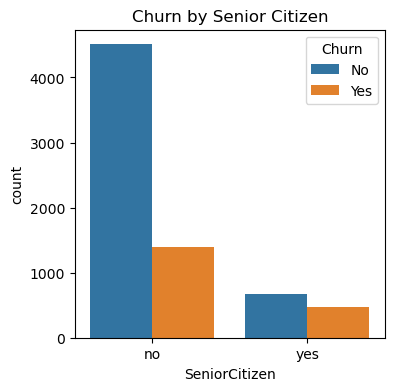

In [42]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x="SeniorCitizen", data = df, hue="Churn")
plt.title("Churn by Senior Citizen")

Text(0.5, 1.0, 'Count of Senior Citizen')

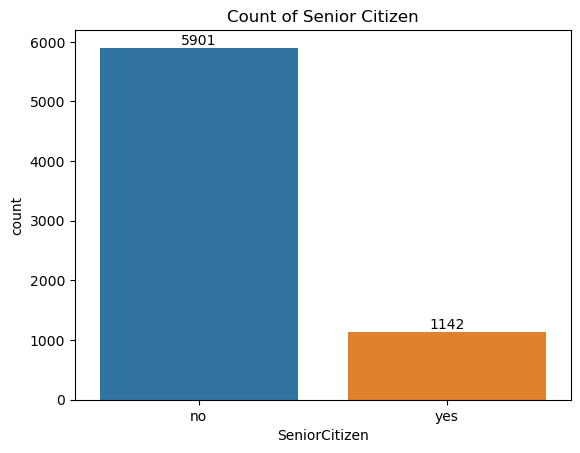

In [46]:
ax = sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Senior Citizen")

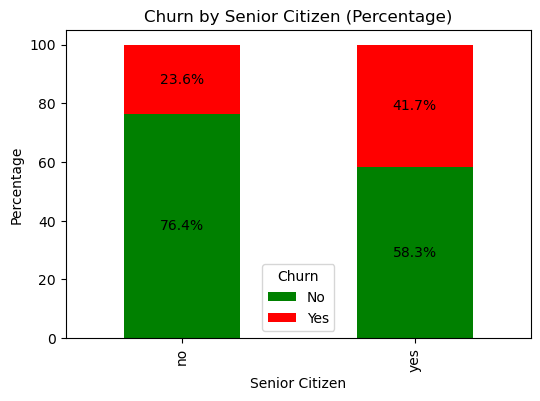

In [45]:
# Calculate the count of each combination of SeniorCitizen and Churn
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)

# Calculate the percentage of each category within SeniorCitizen
percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(6, 4))

# Plot each stack (SeniorCitizen and Churn)
percentage_data.plot(kind='bar', stacked=True, color=["green", "red"], ax=ax)

# Adding title and labels
plt.title("Churn by Senior Citizen (Percentage)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax.annotate(f'{height:.1f}%', (x, y), ha='center', va='center')

plt.show()

# Comparative a greater percentage of people in senior citizen category have churned

C:\Users\Supriya Sharma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tenure', ylabel='Count'>

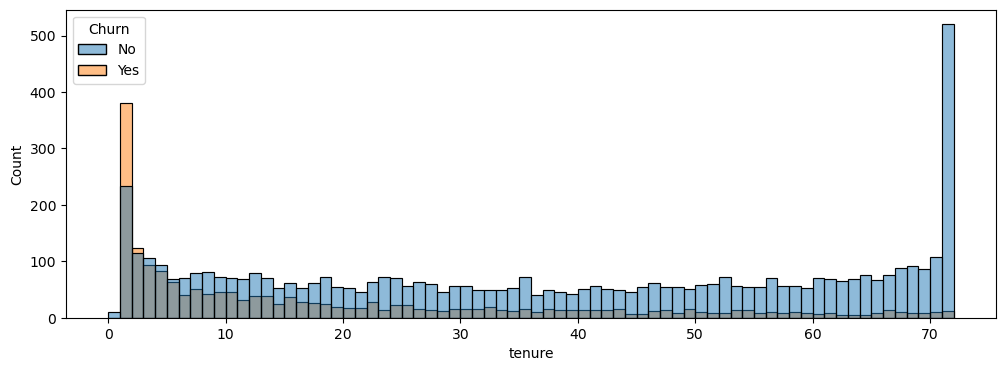

In [53]:
plt.figure(figsize=(12,4))
sns.histplot(x="tenure",data=df, bins = 72 , hue="Churn")

In [ ]:
#People who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned

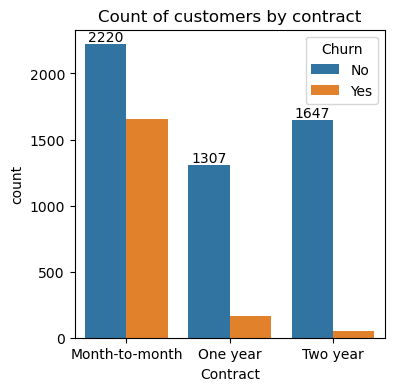

In [57]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="Contract", data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers by contract")
plt.show()

# People who have month to month contract are likely to churn then from those who have 1 or 2 years or contract

In [58]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

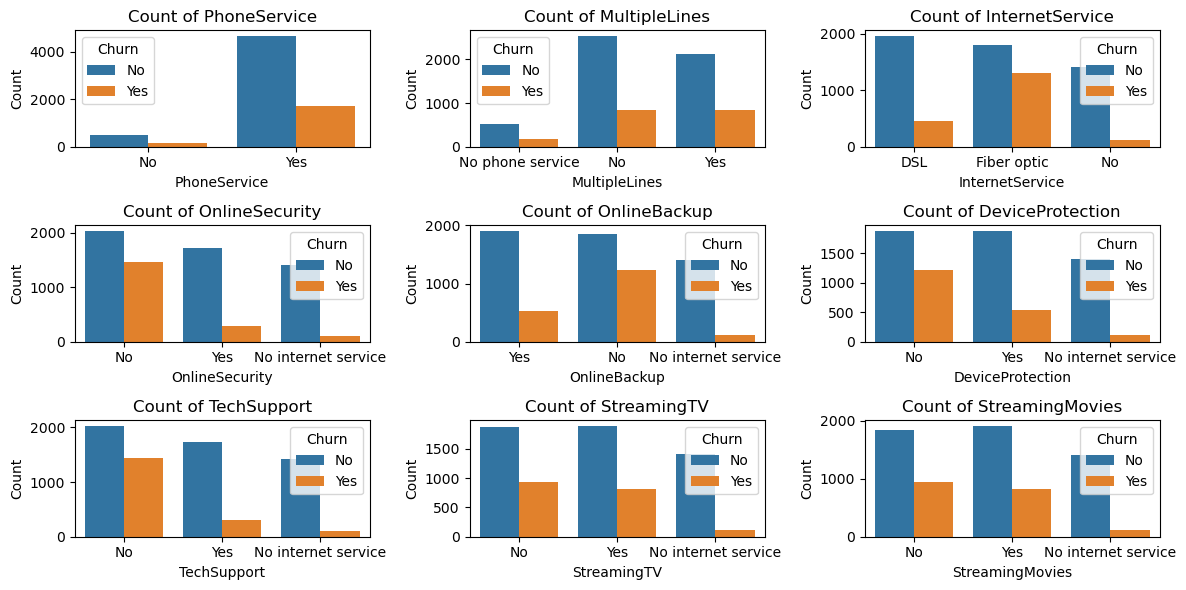

In [60]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots with one row and multiple columns (adjust the number of columns as needed)
num_columns = len(columns)
fig, axes = plt.subplots(nrows=(num_columns // 3) + (num_columns % 3 > 0), ncols=3, figsize=(12, 6))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each column and create a countplot in the corresponding subplot
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue="Churn")
    axes[i].set_title(f"Count of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

#Customers using services like Fiber Optic, lacking Online Security, or not opting for additional support services such as Tech Support and Device Protection, exhibit higher churn rates. Conversely, customers with comprehensive services show lower churn rates.


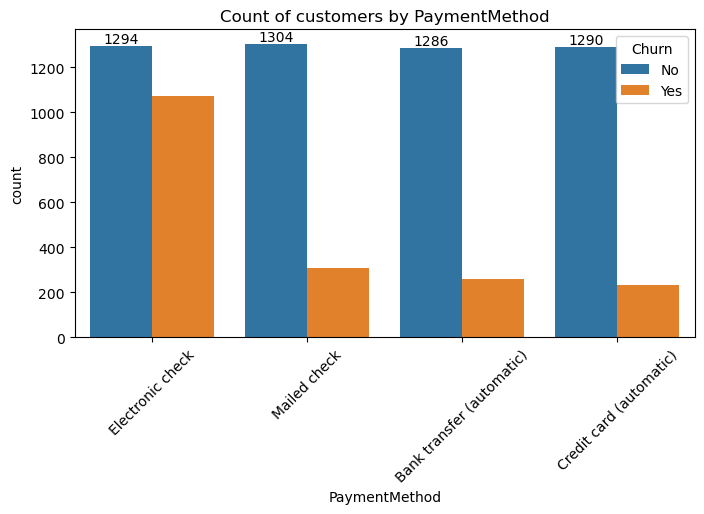

In [66]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="PaymentMethod", data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers by PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#Customer is likely to churn when he is using electronic check